# Exploratory Data Analysis for Machine Learning Project

First, we will import all required libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import scipy.stats as stats 
from scipy.stats import chi2_contingency

Then, we will import data.

### Data Description

Wine dataset contains data collected from chemical analysis of different wines. Fixed acidity, volatile acidity and pH are related to acid content in a wine. Citric acid is an additive not present in all examined wines. Chlorides and sulphates are ionic residues from salts. Free sulfur dioxides and total sulfur dioxide act as an antioxidants and antimicrobial agents to help stabilize wine through its duration.    

In [5]:
wine = pd.read_csv('winequality-red.csv')
wine.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

In [6]:
#Data dimensions
print(wine.shape)

#Column names (variables)
print(wine.columns.tolist())

#Column types
print(wine.dtypes)

(1599, 12)
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


As we can see from above, wine dataset has 12 variables that describe red wines. Wines have been analysed and based on results quality was estimated. All variables are numerical and float except quality that is integer.

We can determine wine distribution based on quality.

In [7]:
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

We can conclude that majority of wines are middle quality wines. High quality wines are rare.

For numerical data we can use describe method.

In [8]:
wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

### Data Exploration and Data Cleaning

All data in wine dataset is numerical. First, we will check for null values and duplicates and if any, remove them. Next, we will identify outliers based on z-score. Threshold is set at 3 and outliers are removed. Since quality is an attribute which we want to understand better and possibly predict, we are going to calculate mean of other features grouped by quality. 

Next steps involve visual representation of distribution and correlation between variables. With histogram we can display distribution of each feature ans see if it is a normal distribution. And with heatmap and scatter plot we can see correlation between them.  

In [9]:
#Checking for null values
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
#Identifying duplicates

duplicate = wine[wine.duplicated()]
duplicate

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.4             0.700         0.00            1.90      0.076   
11              7.5             0.500         0.36            6.10      0.071   
27              7.9             0.430         0.21            1.60      0.106   
40              7.3             0.450         0.36            5.90      0.074   
65              7.2             0.725         0.05            4.65      0.086   
...             ...               ...          ...             ...        ...   
1563            7.2             0.695         0.13            2.00      0.076   
1564            7.2             0.695         0.13            2.00      0.076   
1567            7.2             0.695         0.13            2.00      0.076   
1581            6.2             0.560         0.09            1.70      0.053   
1596            6.3             0.510         0.13            2.30      0.076   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4                    11.0                  34.0  0.99780  3.51       0.56   
11                   17.0                 102.0  0.99780  3.35       0.80   
27                   10.0                  37.0  0.99660  3.17       0.91   
40                   12.0                  87.0  0.99780  3.33       0.83   
65                    4.0                  11.0  0.99620  3.41       0.39   
...                   ...                   ...      ...   ...        ...   
1563                 12.0                  20.0  0.99546  3.29       0.54   
1564                 12.0                  20.0  0.99546  3.29       0.54   
1567                 12.0                  20.0  0.99546  3.29       0.54   
1581                 24.0                  32.0  0.99402  3.54       0.60   
1596                 29.0                  40.0  0.99574  3.42       0.75   

      alcohol  quality  
4         9.4        5  
11       10.5        5  
27        9.5        5  
40       10.5        5  
65       10.9        5  
...       ...      ...  
1563     10.1        5  
1564     10.1        5  
1567     10.1        5  
1581     11.3        5  
1596     11.0        6  

[240 rows x 12 columns]

In [11]:
#Removing duplicates

wine = wine.drop_duplicates().reset_index(drop=True)
wine

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
1354            6.8             0.620         0.08             1.9      0.068   
1355            6.2             0.600         0.08             2.0      0.090   
1356            5.9             0.550         0.10             2.2      0.062   
1357            5.9             0.645         0.12             2.0      0.075   
1358            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1354                 28.0                  38.0  0.99651  3.42       0.82   
1355                 32.0                  44.0  0.99490  3.45       0.58   
1356                 39.0                  51.0  0.99512  3.52       0.76   
1357                 32.0                  44.0  0.99547  3.57       0.71   
1358                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1354      9.5        6  
1355     10.5        5  
1356     11.2        6  
1357     10.2        5  
1358     11.0        6  

[1359 rows x 12 columns]

In [12]:
#Identifying outliers

z = np.abs(stats.zscore(wine))
print(np.where(z > 3))

(array([  11,   12,   13,   13,   15,   15,   17,   30,   35,   38,   39,
         41,   53,   75,   75,   77,   80,   82,   85,   87,   96,   96,
         99,  114,  115,  127,  135,  135,  135,  135,  144,  145,  150,
        150,  159,  176,  202,  202,  211,  214,  226,  226,  241,  245,
        252,  282,  295,  296,  302,  309,  328,  334,  346,  346,  361,
        363,  385,  385,  393,  400,  408,  420,  420,  433,  448,  450,
        473,  483,  483,  485,  485,  492,  506,  510,  513,  516,  528,
        534,  555,  562,  562,  564,  565,  565,  565,  582,  582,  592,
        597,  597,  599,  602,  626,  627,  632,  652,  671,  672,  687,
        710,  718,  722,  764,  764,  771,  781,  786,  791,  792,  838,
        866,  888,  895,  895,  912,  918,  918,  920,  920,  945,  948,
        963,  985,  994, 1003, 1013, 1049, 1052, 1060, 1060, 1060, 1073,
       1081, 1081, 1082, 1082, 1103, 1106, 1106, 1107, 1117, 1121, 1123,
       1123, 1125, 1151, 1159, 1162, 1165, 1165, 1

In [13]:
#Removing outliers

wine = wine[(z < 3).all(axis=1)]
wine.reset_index(drop=True)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
1227            6.8             0.620         0.08             1.9      0.068   
1228            6.2             0.600         0.08             2.0      0.090   
1229            5.9             0.550         0.10             2.2      0.062   
1230            5.9             0.645         0.12             2.0      0.075   
1231            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1227                 28.0                  38.0  0.99651  3.42       0.82   
1228                 32.0                  44.0  0.99490  3.45       0.58   
1229                 39.0                  51.0  0.99512  3.52       0.76   
1230                 32.0                  44.0  0.99547  3.57       0.71   
1231                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1227      9.5        6  
1228     10.5        5  
1229     11.2        6  
1230     10.2        5  
1231     11.0        6  

[1232 rows x 12 columns]

We can calculate mean for each variable grouped by quality.

In [14]:
round(wine.groupby('quality').mean(),3)

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
4                7.923             0.682        0.160           2.504   
5                8.115             0.571        0.235           2.352   
6                8.367             0.498        0.274           2.318   
7                8.805             0.408        0.364           2.584   
8                8.867             0.424        0.416           2.667   

         chlorides  free sulfur dioxide  total sulfur dioxide  density     pH  \
quality                                                                         
4            0.080               12.340                34.298    0.997  3.377   
5            0.085               16.263                54.912    0.997  3.312   
6            0.081               15.033                38.532    0.997  3.318   
7            0.076               13.136                31.396    0.996  3.292   
8            0.071               12.467                29.933    0.996  3.229   

         sulphates  alcohol  
quality                      
4            0.574   10.163  
5            0.598    9.899  
6            0.662   10.630  
7            0.740   11.507  
8            0.774   11.913

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

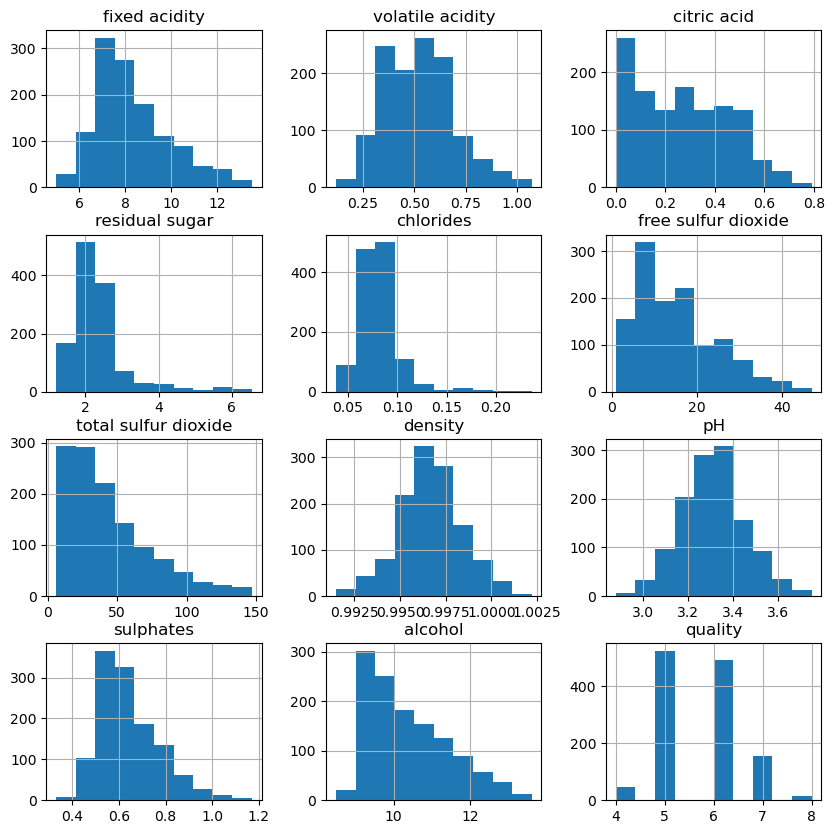

In [15]:
wine.hist(figsize=(10,10))

In [16]:
wine.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

Text(0.5, 1.0, 'quality')

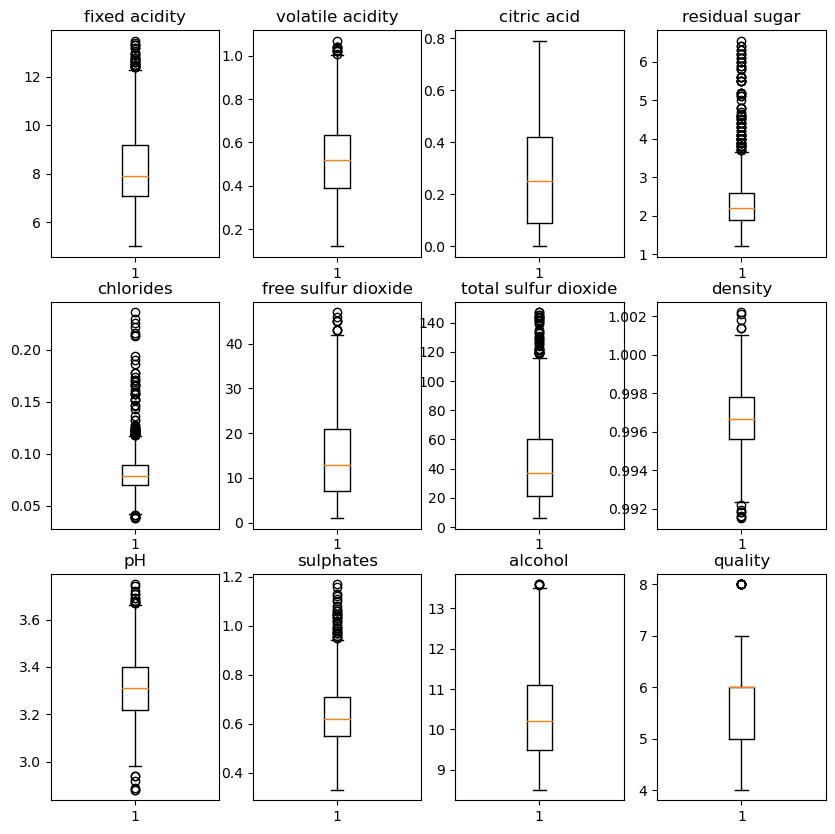

In [17]:
fig, axs = plt.subplots(3, 4, figsize=(10,10))
axs[0, 0].boxplot(wine['fixed acidity'])
axs[0, 0].set_title('fixed acidity')
axs[0, 1].boxplot(wine['volatile acidity'])
axs[0, 1].set_title('volatile acidity')
axs[0, 2].boxplot(wine['citric acid'])
axs[0, 2].set_title('citric acid')
axs[0, 3].boxplot(wine['residual sugar'])
axs[0, 3].set_title('residual sugar')
axs[1, 0].boxplot(wine['chlorides'])
axs[1, 0].set_title('chlorides')
axs[1, 1].boxplot(wine['free sulfur dioxide'])
axs[1, 1].set_title('free sulfur dioxide')
axs[1, 2].boxplot(wine['total sulfur dioxide'])
axs[1, 2].set_title('total sulfur dioxide')
axs[1, 3].boxplot(wine['density'])
axs[1, 3].set_title('density')
axs[2, 0].boxplot(wine['pH'])
axs[2, 0].set_title('pH')
axs[2, 1].boxplot(wine['sulphates'])
axs[2, 1].set_title('sulphates')
axs[2, 2].boxplot(wine['alcohol'])
axs[2, 2].set_title('alcohol')
axs[2, 3].boxplot(wine['quality'])
axs[2, 3].set_title('quality')

In [18]:
correlation = wine.corr()['quality'].sort_values()
correlation

volatile acidity       -0.359736
total sulfur dioxide   -0.239612
density                -0.179034
chlorides              -0.119767
pH                     -0.078959
free sulfur dioxide    -0.076318
residual sugar          0.052219
fixed acidity           0.142221
citric acid             0.245672
sulphates               0.385837
alcohol                 0.505716
quality                 1.000000
Name: quality, dtype: float64

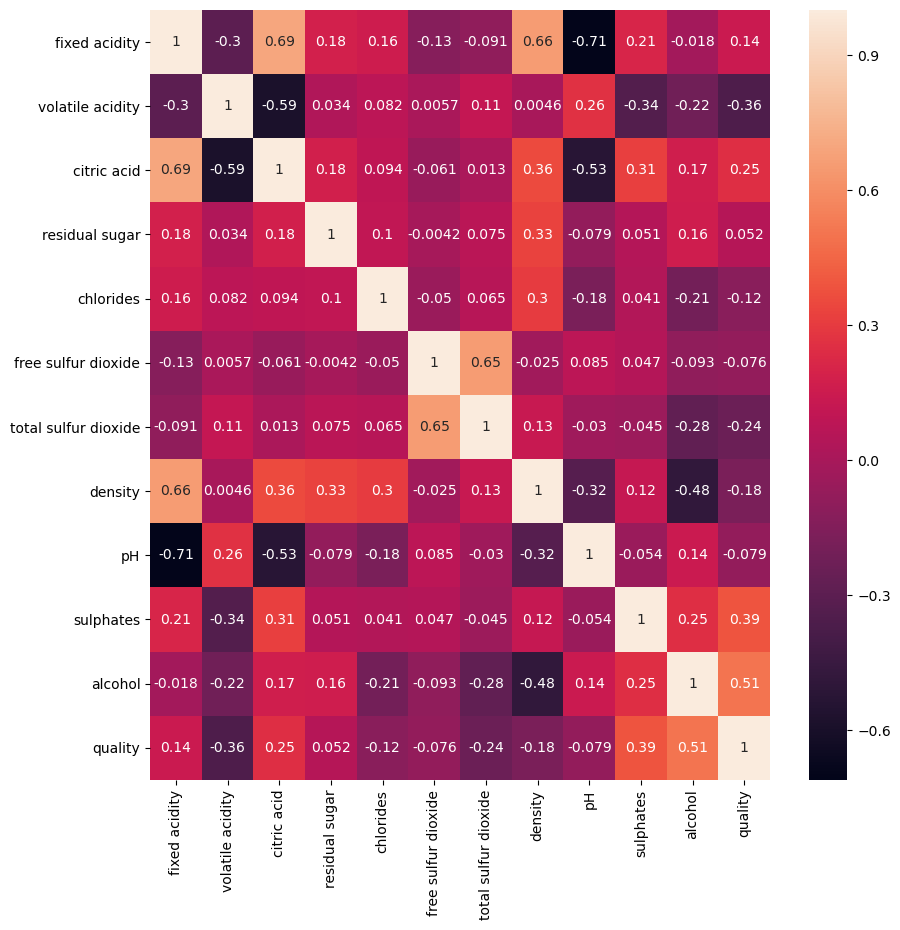

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(wine.corr(),annot=True)

plt.show()

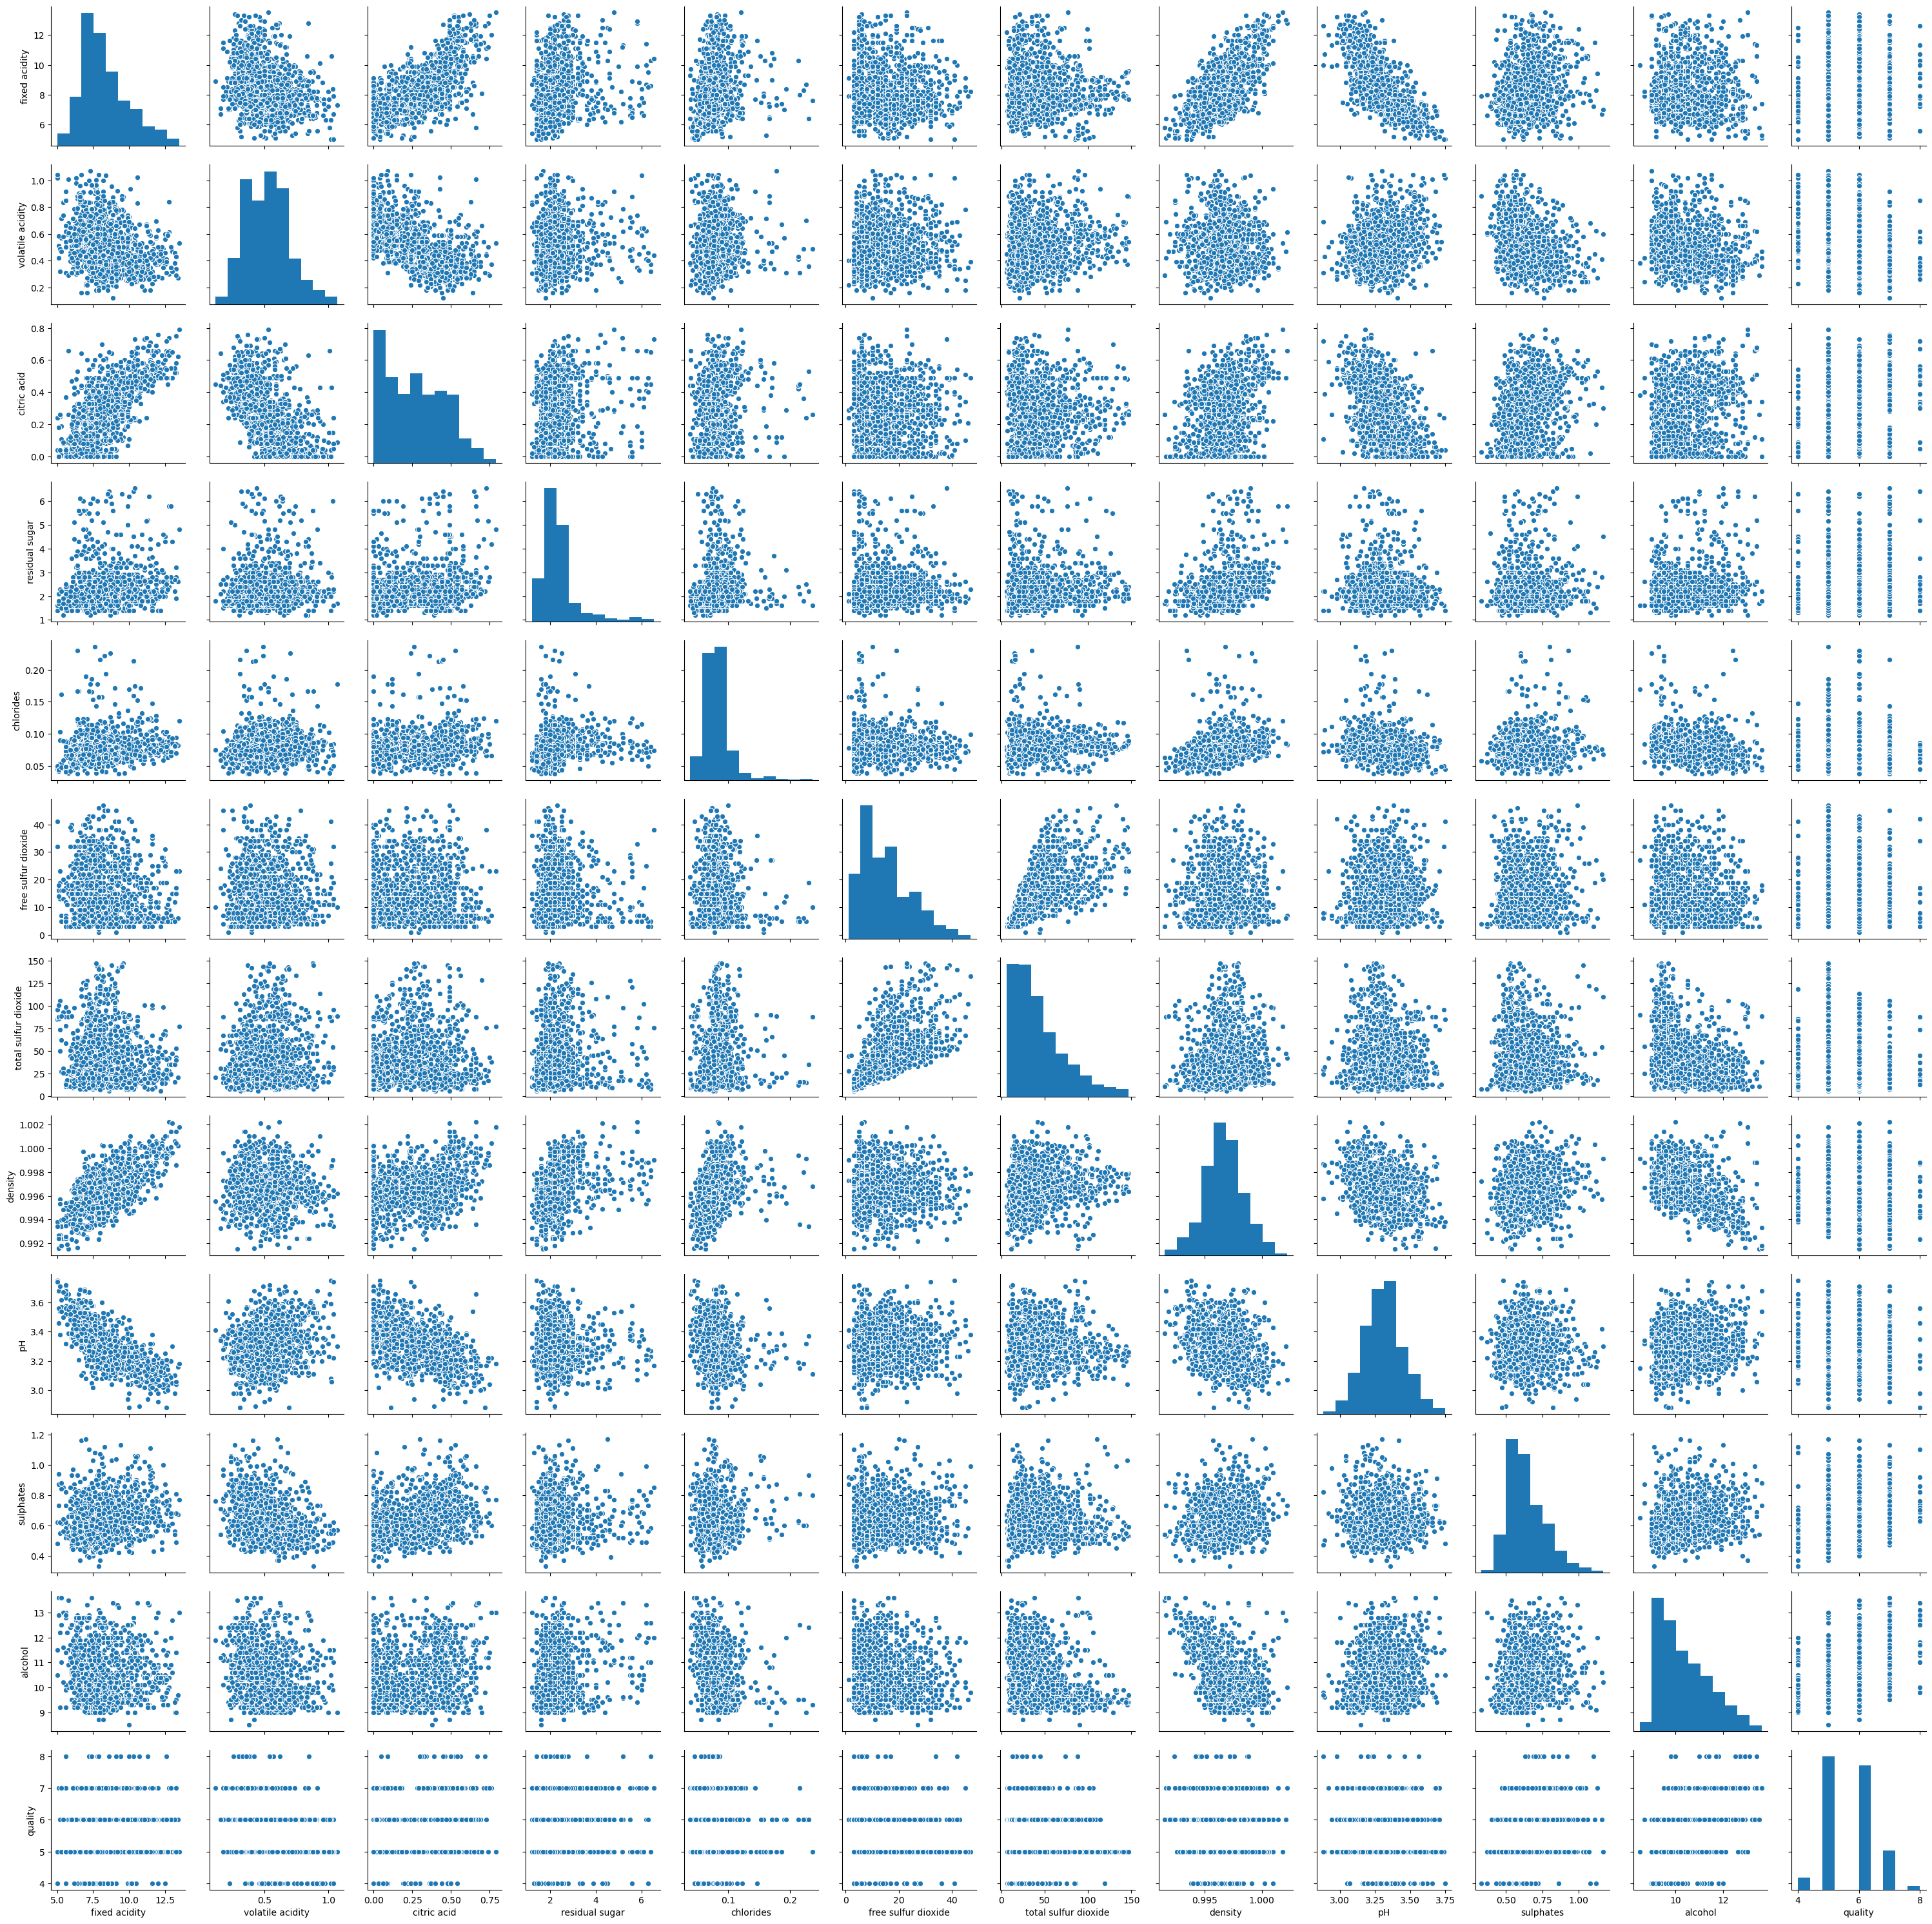

In [20]:
sns.pairplot(wine)

From graphs above, we can conclude that there are still some outliers, but they don't affect trends shown in graphs. From heatmap and scatter plots we can see that there aren't many strong correlations between variables, but there is some multicollinearity. Features like fixed acidity, volatile acidity, citric acid and pH have high mutual correlation.   

### Feature Engineering

From histograms we could see that not all variables are normally distributed. Most of them are right-skewed.
In cell wee will display skewness of each distribution and if skewness is greater then 0.80 we perform log transformation on that feature.

In [21]:
for col in wine.columns.tolist():
    print("Skewness of",col,"is :",round(wine[col].skew(),2))

Skewness of fixed acidity is : 0.81
Skewness of volatile acidity is : 0.43
Skewness of citric acid is : 0.28
Skewness of residual sugar is : 2.37
Skewness of chlorides is : 2.46
Skewness of free sulfur dioxide is : 0.87
Skewness of total sulfur dioxide is : 1.16
Skewness of density is : 0.02
Skewness of pH is : 0.12
Skewness of sulphates is : 0.95
Skewness of alcohol is : 0.77
Skewness of quality is : 0.4


In [22]:
res_sug_log_transformed = np.log(wine['residual sugar'])
chl_log_transformed = np.log(wine['chlorides'])
free_sulf_log_transformed = np.log(wine['free sulfur dioxide'])
total_sulf_log_transformed = np.log(wine['total sulfur dioxide'])
sulph_log_transformed = np.log(wine['sulphates'])

Also, we perform log transformation on fixed acidity and volatile acidity because pH is negative logarithm of hydrogen ions concentration and log transformation of this variables will put them on the same scale as pH.

In [23]:
fx_ac_log_transformed = np.log(wine['fixed acidity'])
vol_ac_log_transformed = np.log(wine['volatile acidity'])

After log transformation skewness is significantly lower, although some variables like residual sugar are still highly skewed.

In [24]:
print("Skewness of fixed acidity is :",round(fx_ac_log_transformed.skew(),2))
print("Skewness of volatile acidity is :",round(vol_ac_log_transformed.skew(),2))
print("Skewness of residual sugar is :",round(res_sug_log_transformed.skew(),2))
print("Skewness of chlorides is :",round(chl_log_transformed.skew(),2))
print("Skewness of free sulfur dioxide is :",round(free_sulf_log_transformed.skew(),2))
print("Skewness of total sulfur dioxide is :",round(total_sulf_log_transformed.skew(),2))
print("Skewness of sulphates is :",round(sulph_log_transformed.skew(),2))

Skewness of fixed acidity is : 0.35
Skewness of volatile acidity is : -0.41
Skewness of residual sugar is : 1.13
Skewness of chlorides is : 0.61
Skewness of free sulfur dioxide is : -0.29
Skewness of total sulfur dioxide is : -0.1
Skewness of sulphates is : 0.38


### Hypothesis testing

We will add to wine dataset column 'description' that gives linguistic description of wine quality. wines with mark lower or equal to 6 will be classified like Low and with mark greater than 7 like High. 

In [25]:
description = []

for row in wine['quality']:
    if row <= 6:
        description.append('Low')
    else:
        description.append('High')
        
wine['description'] = description

#### Example 1 

We will see if high quality wines have greater alcohol content.

H0: Average alcohol content in high quality wines is less than or equal to alcohol content in low quality wines.

H1: Average alcohol content in high quality wines is greater than alcohol content in low quality wines.

In [26]:
#Calculating avg alcohol in low and high quality wines

low = wine[wine['description']=='Low']
low_alc_mean = round(low['alcohol'].mean(),3)
print(low_alc_mean)

high = wine[wine['description']=='High']
high_alc_mean = round(high['alcohol'].mean(),3)
print(high_alc_mean)

10.248
11.543


[Text(0.5, 1.0, 'Alcohol content based on quality')]

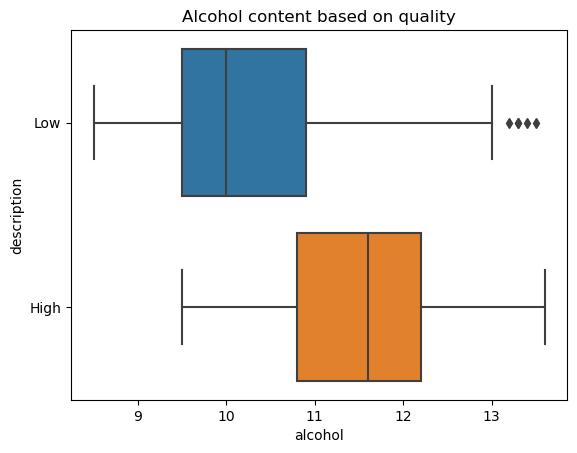

In [27]:
#Visualize alcohol content based on quality

sns.boxplot(x=wine['alcohol'],y=wine['description']).set(title="Alcohol content based on quality")

In [28]:
alpha=0.05
t_val2, p_value2 = stats.ttest_ind(high['alcohol'], low['alcohol'])
p_value_onetail=p_value2/2
print("t_value = {} , p_value ={} , p_value_onetail = {}".format(t_val2, p_value2, p_value_onetail))

t_value = 16.657127604104875 , p_value =2.4738258464435493e-56 , p_value_onetail = 1.2369129232217747e-56


For alpha we choose 0,5 and perform two-tailed t-test. High t_value and low p_value (p_value << 0,5) suggest there is a significant difference in alcohol content in high and low quality wines. We reject null hypotesis. 

#### Example 2

We can check if there is difference in wine quality based on content of citric acid. Citric acid is an additive that is artificially putted in wine to help preserve wine through its duration.

H0: Citric acid content is not different based on wine quality.

H1: Citric acid content is different based on wine quality.

In [29]:
citric_content = []

for row in wine['citric acid']:
    if row == 0:
        citric_content.append('No')
    else:
        citric_content.append('Yes')
        
wine['citric content'] = citric_content

We are comparing two categorical variables so we will perform chi-square test.

In [30]:
contingency= pd.crosstab(wine['quality'], wine['citric content'])
contingency

citric content  No  Yes
quality                
4               10   37
5               48  477
6               41  450
7                6  148
8                0   15

<AxesSubplot:xlabel='quality'>

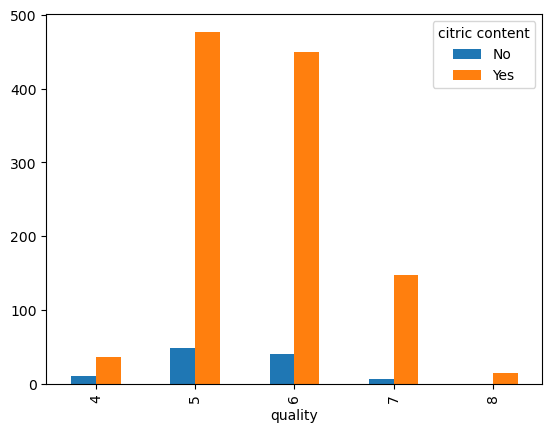

In [31]:
contingency.plot(kind='bar')

In [32]:
chi2, p_val, dof, exp_freq = chi2_contingency(contingency, correction = False)
print('chi-square statistic: {} , p_value: {} , degree of freedom: {} ,expected frequencies: {} '.format(chi2, p_val, dof, exp_freq))

chi-square statistic: 15.709370721839287 , p_value: 0.0034349990747073447 , degree of freedom: 4 ,expected frequencies: [[  4.00568182  42.99431818]
 [ 44.74431818 480.25568182]
 [ 41.84659091 449.15340909]
 [ 13.125      140.875     ]
 [  1.27840909  13.72159091]] 


p_value is lower than 0,05 so we can reject null hypothesis. There is difference in citric acid content vased on wine quality.

#### Example 3

We can see if high quality wines have more residual sugar.

H0: Average residual sugar in high quality wines is less than or equal to residual sugar in low quality wines.

H1: Average residual sugar in high quality wines is greater than residual sugar in low quality wines.

For testing hypothesis we will use right-tale t-test in the same manner as that is performed in example 1.

In [33]:
alpha=0.05
t_val2, p_value2 = stats.ttest_ind(high['residual sugar'], low['residual sugar'])
p_value_onetail=p_value2/2
print("t_value = {} , p_value ={} , p_value_onetail = {}".format(t_val2, p_value2, p_value_onetail))

t_value = 3.6672140875433903 , p_value =0.00025567606437604435 , p_value_onetail = 0.00012783803218802218


### Conclusion

Wine dataset is rich in information about examined wines. Features are numerical, some are correlated with wine quality and some are correlated with each other. Further analysis may include building linear regression model based on selected features that predicts wine quality. Right model should be carefully selected because of multicollinearity present in dataset. 